In [1]:
import matplotlib.pyplot as plt
import numpy as np



In [2]:
import gpm_utils_2 as gpm_utils

In [3]:
import analysis_utils

# merger freq

In [4]:
gpm_omega_merger = gpm_utils.GPM_Omega_Merger(model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_merger_03_03_23/components.cpkl')

In [5]:
t_star = np.arange(-300, 0, 1)
q_star = 18

In [6]:
yhat = gpm_omega_merger.predict(t_star, q_star, n_samples=-1)[0]
yhats = gpm_omega_merger.predict(t_star, q_star, n_samples=100)

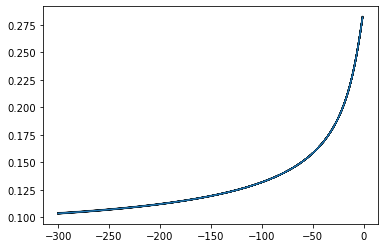

In [7]:
plt.plot(t_star, yhats.T, c='k', alpha=0.1);
plt.plot(t_star, yhat)

# inspiral freq

In [8]:
gpm_omega_inspiral = gpm_utils.GPM_Omega_Inspiral(model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_03_03_23/components.cpkl', gpm_omega_merger=gpm_omega_merger)

In [9]:
t_star = np.arange(-800, -100, 1)
q_star = 22

In [10]:
yhat = gpm_omega_inspiral.predict(t_star, q_star, n_samples=-1)[0]
yhats = gpm_omega_inspiral.predict(t_star, q_star, n_samples=100)

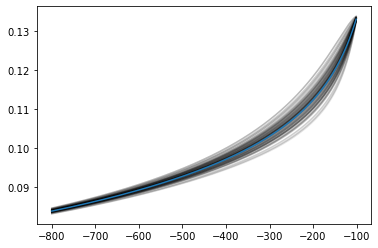

In [11]:
plt.plot(t_star, yhats.T, c='k', alpha=0.1);
plt.plot(t_star, yhat)

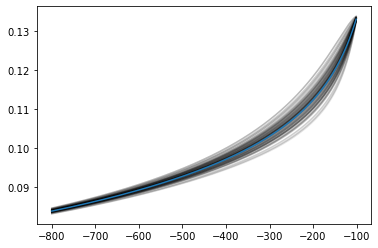

In [12]:
plt.plot(t_star, yhats.T, c='k', alpha=0.1);
plt.plot(t_star, yhat)

# inspiral amp

In [13]:
gpm_amp_inspiral = gpm_utils.GPM_Amp_Inspiral(
    model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_inspiral_26_02_23/components.cpkl',
    gpm_omega_inspiral=gpm_omega_inspiral
)

In [14]:
yhat = gpm_amp_inspiral.predict(t_star, q_star, n_samples=-1)[0]
yhats = gpm_amp_inspiral.predict(t_star, q_star, n_samples=100)

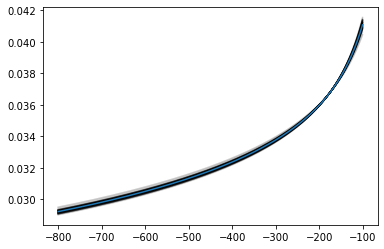

In [15]:
plt.plot(t_star, yhats.T, c='k', alpha=0.1);
plt.plot(t_star, yhat)

# merger amp

In [16]:
gpm_amp_merger = gpm_utils.GPM_Amp_Merger(model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_merger_26_02_23/components.cpkl')

In [17]:
t_star = np.arange(-300, 0, 1)
q_star = 18

In [18]:
yhat = gpm_amp_merger.predict(t_star, q_star, n_samples=-1)[0]
yhats = gpm_amp_merger.predict(t_star, q_star, n_samples=100)

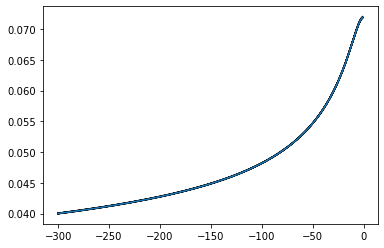

In [19]:
plt.plot(t_star, yhats.T, c='k', alpha=0.1);
plt.plot(t_star, yhat)

# ringdown freq

In [20]:
gpm_omega_ringdown = gpm_utils.GPM_Omega_Ringdown(model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_ringdown_26_02_23/components.cpkl')

In [21]:
t_star = np.arange(-10, 40, 1)
q_star = 18

In [22]:
yhat = gpm_omega_ringdown.predict(t_star, q_star, n_samples=-1)[0]
yhats = gpm_omega_ringdown.predict(t_star, q_star, n_samples=100)

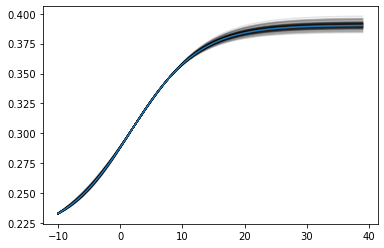

In [23]:
plt.plot(t_star, yhats.T, c='k', alpha=0.1);
plt.plot(t_star, yhat)

# ringdown amp

In [24]:
gpm_amp_ringdown = gpm_utils.GPM_Amp_Ringdown(model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_ringdown_26_02_23/components.cpkl')

In [25]:
t_star = np.arange(-10, 40, 1)
q_star = 18

In [26]:
yhat = gpm_amp_ringdown.predict(t_star, q_star, n_samples=-1)[0]
yhats = gpm_amp_ringdown.predict(t_star, q_star, n_samples=100)

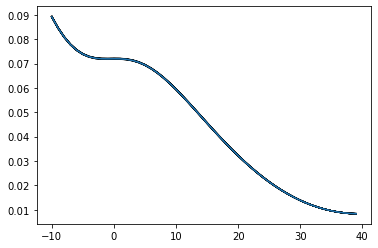

In [27]:
plt.plot(t_star, yhats.T, c='k', alpha=0.1);
plt.plot(t_star, yhat)

# final model

In [51]:
gpm = gpm_utils.GPM(
    inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_03_03_23/components.cpkl',
    merger_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_merger_03_03_23/components.cpkl',
    ringdown_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_ringdown_26_02_23/components.cpkl',
    inspiral_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_inspiral_04_03_23/components.cpkl',
    merger_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_merger_04_03_23/components.cpkl',
    ringdown_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_ringdown_26_02_23/components.cpkl',
)

In [52]:
t_star = np.arange(-1000, 100, 1)
q_star = 32

In [53]:
yhat = gpm.generate_frequency(t=t_star, q=q_star, n_samples=-1)
yhats = gpm.generate_frequency(t=t_star, q=q_star, n_samples=100)

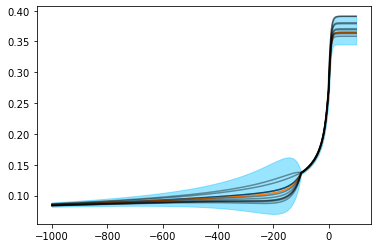

In [54]:
plt.plot(t_star, yhat[0])

plt.plot(t_star, yhats[0])
plt.plot(t_star, yhats[1:10].T, c='k', alpha=0.4)

plt.fill_between(t_star, y1=yhats.min(0), y2=yhats.max(0), color='deepskyblue', alpha=0.4)

# plt.xlim(-10, 10)

In [55]:
yhat_amp = gpm.generate_amplitude(t=t_star, q=q_star, n_samples=-1)
yhats_amp = gpm.generate_amplitude(t=t_star, q=q_star, n_samples=100)

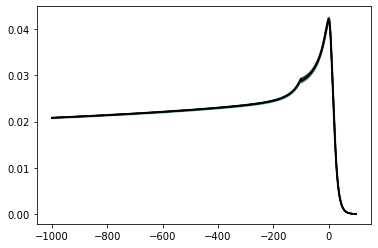

In [56]:
plt.plot(t_star, yhat_amp[0])
plt.plot(t_star, yhats_amp[0])
plt.plot(t_star, yhats_amp[1:10].T, c='k', alpha=0.4)

plt.fill_between(t_star, y1=yhats_amp.min(0), y2=yhats_amp.max(0), color='deepskyblue', alpha=0.4)
# plt.yscale('log')

In [57]:
yhat_phi = gpm.generate_phase(t=t_star, q=q_star, n_samples=-1)
yhats_phi = gpm.generate_phase(t=t_star, q=q_star, n_samples=100)

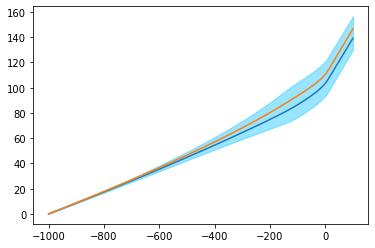

In [58]:
plt.plot(t_star, yhat_phi[0])

plt.plot(t_star, yhats_phi[0])
# plt.plot(t_star, yhats_phi[1:10].T, c='k', alpha=0.4)

plt.fill_between(t_star, y1=yhats_phi.min(0), y2=yhats_phi.max(0), color='deepskyblue', alpha=0.4)

# plt.xlim(-10, 10)

In [59]:
yhat_h22 = gpm.generate_h22(t=t_star, q=q_star, n_samples=-1)
yhats_h22 = gpm.generate_h22(t=t_star, q=q_star, n_samples=100)

(-100.0, 100.0)

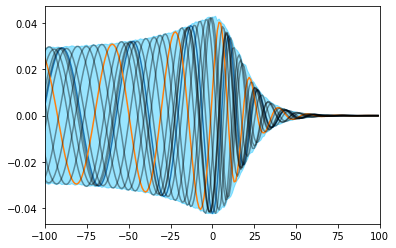

In [60]:
plt.plot(t_star, yhat_h22[0].real)

plt.plot(t_star, yhats_h22[0].real)
plt.plot(t_star, yhats_h22[1:10].real.T, c='k', alpha=0.4)
plt.fill_between(t_star, y1=yhats_h22.real.min(0), y2=yhats_h22.real.max(0), color='deepskyblue', alpha=0.4)

plt.xlim(-100, 100)

In [61]:
yhat_hp, yhat_hc = gpm.generate_pycbc_hp_hc(times=t_star, q=q_star, M=100, delta_t=1/4096., n_samples=-1)
yhats_hp, yhats_hc = gpm.generate_pycbc_hp_hc(times=t_star, q=q_star, M=100, delta_t=1/4096., n_samples=100)

(-0.1, 0.1)

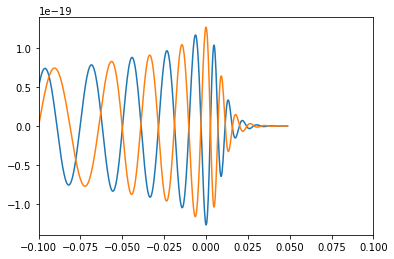

In [62]:
plt.plot(yhat_hp[0].sample_times, yhat_hp[0])
plt.plot(yhats_hp[0].sample_times, yhats_hp[0])
plt.xlim(-0.1,0.1)

# test co-align

In [63]:
matches = [analysis_utils.compute_match(yhat_hp[0], yhats_hp[i], 30) for i in range(len(yhats_hp))]
matches = np.array(matches)

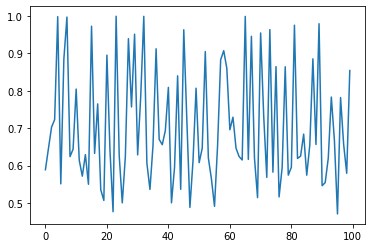

In [64]:
plt.plot(matches)

In [65]:
hp1, hc1, hp2, hc2 = analysis_utils.my_coalign_waveforms(yhat_hp[0], yhat_hc[0], yhats_hp[0], yhats_hc[0], 100)

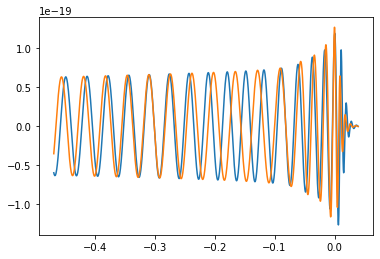

In [66]:
plt.figure()
plt.plot(hp1.sample_times, hp1)
plt.plot(hp2.sample_times, hp2)
# plt.xlim(-0.1,0.1)